# 📘 Теоретическая часть: Линейная регрессия

## Что такое линейная регрессия?

Линейная регрессия — это базовая модель машинного обучения и статистики, используемая для оценки зависимости между одной зависимой переменной (целевой) и одной или несколькими независимыми переменными (признаками).

**Общий вид уравнения линейной регрессии:**

    y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

где:
- `y` — зависимая переменная (target)
- `x₁, x₂, ..., xₙ` — независимые переменные (features)
- `β₀` — свободный член (intercept)
- `β₁, ..., βₙ` — коэффициенты модели (weights)
- `ε` — ошибка модели (ошибка прогноза)

## Цель линейной регрессии

Найти такие коэффициенты `β`, чтобы минимизировать **сумму квадратов ошибок** между предсказанными и фактическими значениями:

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

## Интерпретация коэффициентов

Коэффициент $ \beta_j $ показывает изменение $ y $ при увеличении $ x_j $ на 1 единицу при фиксированных остальных признаках.

---

## Математическое представление

Линейная регрессия описывается уравнением:

$
y = X \beta + \varepsilon
$

где:
- $ y \in \mathbb{R}^{n} $ — вектор наблюдаемых значений
- $ X \in \mathbb{R}^{n \times p} $ — матрица признаков
- $ \beta \in \mathbb{R}^{p} $ — вектор параметров модели
- $ \varepsilon \in \mathbb{R}^{n} $ — вектор случайных ошибок

## Метод наименьших квадратов (OLS)

Цель — минимизировать сумму квадратов ошибок:

$
\min_{\beta} \| y - X\beta \|^2
$

Решение имеет аналитическую форму:

$
\hat{\beta} = (X^T X)^{-1} X^T y
$

## Основные ограничения линейной регрессии

1. **Линейность**  
2. **Нормальность ошибок**  
3. **Гомоскедастичность (постоянство дисперсии ошибок)**  
4. **Отсутствие автокорреляции**  
5. **Отсутствие мультиколлинеарности**

# 🔍 Практическая часть I: Базовая линейная регрессия и проверка ограничений

## 1. Линейность

Модель данных адекватна устройству данных (модель данных и устройство данных имеют одинаковую функциональную форму).
<br>Устройство данных — это наблюдения случайной величины. Модель данных — это уравнение регрессии. «Иметь одинаковую функциональную форму» означает «иметь одинаковую функциональную зависимость». Например, если точки наблюдений очевидно расположены вдоль невидимой экспоненты, логарифма или любой нелинейной функции, нет смысла строить линейное уравнение регрессии.

**Нарушение:** Модель не улавливает кривизну — плохие прогнозы.

## Реализация базовой библиотечной линейной регрессии

In [ ]:
# Готовая линейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Библиотеки для рисования
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки со статистическими инструментами
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

In [ ]:
model = LinearRegression()

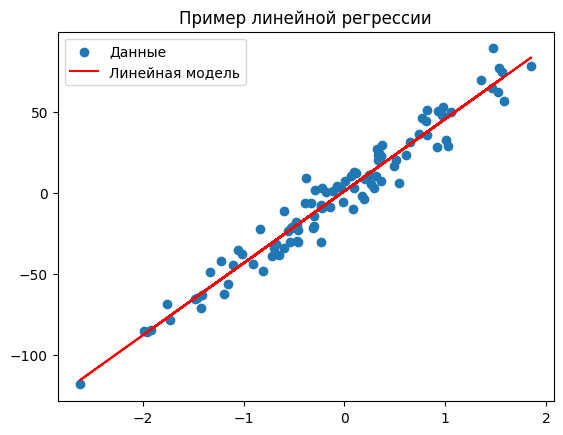

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
model.fit(X, y)

plt.scatter(X, y, label='Данные')
plt.plot(X, model.predict(X), color='red', label='Линейная модель')
plt.title("Пример линейной регрессии")
plt.legend()
plt.show()


## Нелинейность

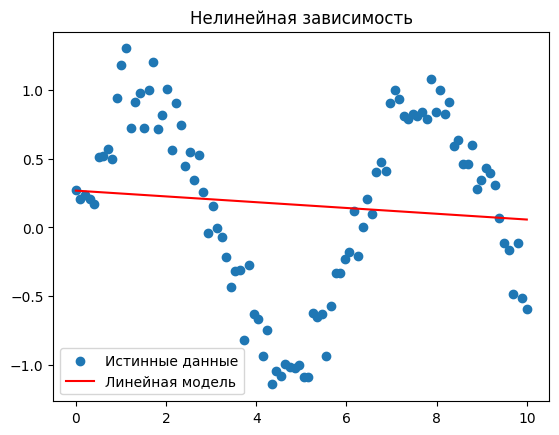

In [ ]:
# Посмотрим, что будет при попытке построить линейную регрессию для
# явно нелинейно зависисмых X и Y(функция синуса).

X_nl = np.linspace(0, 10, 100)
y_nl = np.sin(X_nl) + np.random.normal(0, 0.2, 100)

model.fit(X_nl.reshape(-1,1), y_nl)
y_pred_nl = model.predict(X_nl.reshape(-1,1))

plt.scatter(X_nl, y_nl, label='Истинные данные')
plt.plot(X_nl, y_pred_nl, color='red', label='Линейная модель')
plt.title("Нелинейная зависимость")
plt.legend()
plt.show()


In [ ]:
#! conda install statsmodels --y

## 2. Нормальность ошибок

**Нарушение:** Статистические выводы становятся недостоверными.

Почему предполагается нормальность ошибок?

Для корректности интервалов и статистических тестов
Если ошибки нормально распределены, тогда:

  - Коэффициенты β также будут нормально распределены.
  - Мы можем использовать t-распределение для построения доверительных интервалов проверки гипотез (например, значим ли коэффициент)

Если ошибки НЕ нормальны → доверительные интервалы и p-value могут быть некорректны.

Когда это не критично?
Если размер выборки достаточно большой (обычно n>30), работает Центральная предельная теорема (ЦПТ):

Даже если ошибки не нормальны — оценки коэффициентов всё равно асимптотически нормальн

**Способы проверки**<br>
Визуально:<br>
  - Гистограмма остатков
  - Q-Q график (Quantile-Quantile)

<br>Статистически:<br>
  - Shapiro-Wilk тест
  - D’Agostino-Pearson тест
  - Kolmogorov-Smirnov тест
___

Сейчас мы сгенерируем уравнение линейной регрессии вида: <br>
   
    y = 3*x + ε
    
    ε ∼ N(0,σ)
    где:
     ε — вектор ошибок (residuals)
     σ  — постоянная дисперсия ошибок

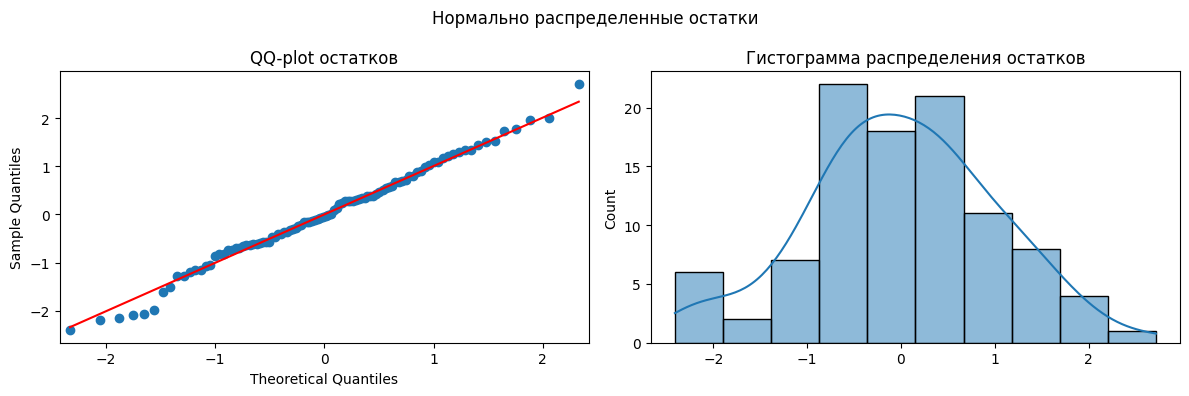

In [ ]:
# Cгенерируем данные:
# вектор X из 100 наблюдений и вектор errors из 100 наблюдений, распределенных нормально.
X = np.random.normal(0, 1, 100)
errors = np.random.normal(scale=1, size=100)
y_e_norm = 3 * X + errors


# Теперь обучим линейную регрессию с помощью МНК.
model = LinearRegression()
model.fit(X.reshape(-1,1), y_e_norm)
# Сохраним вектор предсказаний нашей модели.
y_pred_e_norm = model.predict(X.reshape(-1,1))

# Посчитаем остатки: разницы между предсказаниями и реальными значениями целевой переменной.
residuals = y_e_norm - y_pred_e_norm
residuals_e_norm = residuals.copy()

# Нарисуем QQ-plot остатков.
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=False, figsize=(12, 4))
sm.qqplot(residuals, line='s', ax=axes[0])
axes[0].set_title("QQ-plot остатков")

# Нарисуем гистаграмму распределения остатков.
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title("Гистограмма распределения остатков")

plt.suptitle("Нормально распределенные остатки")
plt.tight_layout()
plt.show()


### Гипотезы:
- **H₀**: ошибки распределены нормально
- **H₁**: ошибки не распределены нормально

Если `p-value < 0.05`, отвергаем H₀

In [ ]:
# 🧪 Shapiro-Wilk тест
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# 🧪 D’Agostino-Pearson тест
dagostino_stat, dagostino_p = stats.normaltest(residuals)
print(f"D’Agostino-Pearson p-value: {dagostino_p:.4f}")

Shapiro-Wilk p-value: 0.8082
D’Agostino-Pearson p-value: 0.9328


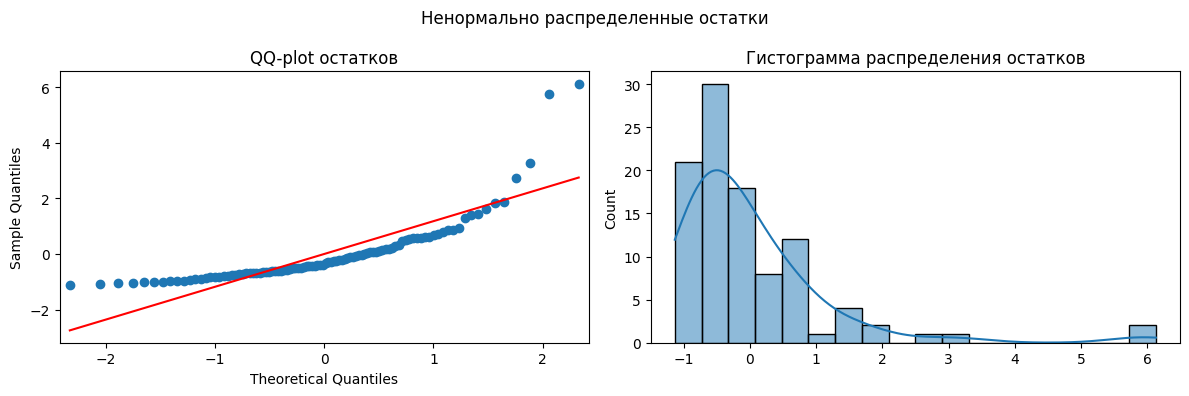

In [ ]:
# Cгенерируем данные новый вектор errors из 100 наблюдений, распределенных экспониненциально.
errors = np.random.exponential(scale=1, size=100)
y_e_exp = 3 * X + errors


# Теперь обучим линейную регрессию с помощью МНК.
model = LinearRegression()
model.fit(X.reshape(-1,1), y_e_exp)
# Сохраним вектор предсказаний нашей модели.
y_pred_e_exp = model.predict(X.reshape(-1,1))

# Посчитаем остатки: разницы между предсказаниями и реальными значениями целевой переменной.
residuals = y_e_exp - y_pred_e_exp
residuals_e_exp = residuals.copy()

# Нарисуем QQ-plot остатков.
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=False, figsize=(12, 4))
sm.qqplot(residuals, line='s', ax=axes[0])
axes[0].set_title("QQ-plot остатков")

# Нарисуем гистаграмму распределения остатков.
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title("Гистограмма распределения остатков")

plt.suptitle("Ненормально распределенные остатки")
plt.tight_layout()
plt.show()


### Гипотезы:
- **H₀**: ошибки распределены нормально
- **H₁**: ошибки не распределены нормально

Если `p-value < 0.05`, отвергаем H₀

In [ ]:
# 🧪 Shapiro-Wilk тест
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# 🧪 D’Agostino-Pearson тест
dagostino_stat, dagostino_p = stats.normaltest(residuals)
print(f"D’Agostino-Pearson p-value: {dagostino_p:.4f}")

Shapiro-Wilk p-value: 0.0000
D’Agostino-Pearson p-value: 0.0000


## 3. Гомоскедастичность

Не должно быть априорной причины для того, чтобы случайный член порождал бо́льшую ошибку в одних наблюдениях, чем в других. <br>
**Нарушение:** Ошибки имеют непостоянную дисперсию.


Гомоскедастичность — это условие, при котором ошибки модели имеют постоянную дисперсию при всех значениях признаков. Проверка:

  - Построй график остатков против предсказанных значений
  - При гомоскедастичности облако точек должно быть без структуры

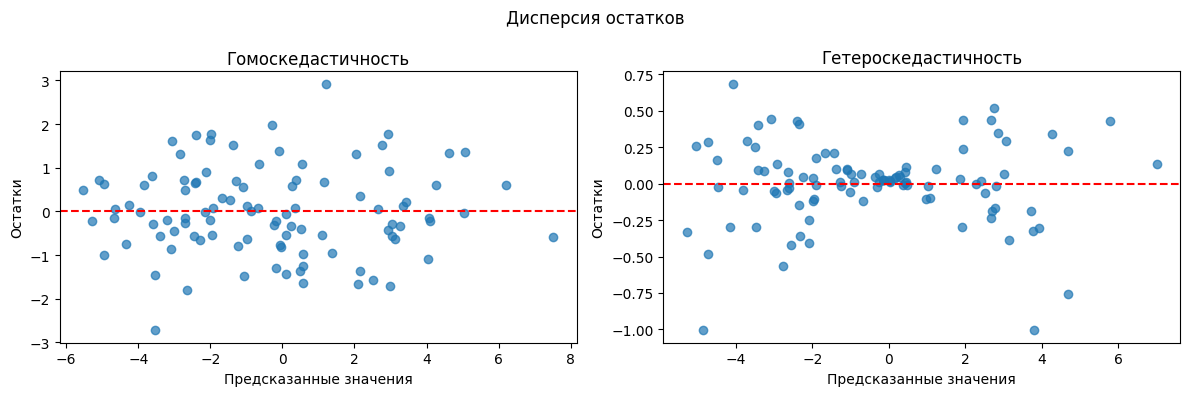

In [ ]:
# --------- Гомоскедастичность

# Cгенерируем новый вектор errors из 100 наблюдений с постоянной дисперсией.
errors = np.random.normal(scale=1, size=100)
y_e_const = 3 * X + errors

# Теперь обучим линейную регрессию с помощью МНК.
model = LinearRegression()
model.fit(X.reshape(-1,1), y_e_const)
# Сохраним вектор предсказаний нашей модели.
y_pred_e_const = model.predict(X.reshape(-1,1))

# Посчитаем остатки: разницы между предсказаниями и реальными значениями целевой переменной.
residuals_const = y_e_const - y_pred_e_const

# Создадим фигуру для будущих графиков
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=False, figsize=(12, 4))

# Нарисуем График остатков против предсказанных значений
axes[0].scatter(y_pred_e_const, residuals_const, alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Предсказанные значения")
axes[0].set_ylabel("Остатки")
axes[0].set_title("Гомоскедастичность")

# --------- Гетероскедастичность

# Cгенерируем новый вектор errors из 100 наблюдений с вариативной дисперсией.
errors = np.random.normal(scale=0.3*abs(X), size=100)
y_e_var = 3 * X + errors

# Теперь обучим линейную регрессию с помощью МНК.
model = LinearRegression()
model.fit(X.reshape(-1,1), y_e_var)
# Сохраним вектор предсказаний нашей модели.
y_pred_e_var = model.predict(X.reshape(-1,1))

# Посчитаем остатки: разницы между предсказаниями и реальными значениями целевой переменной.
residuals_var = y_e_var - y_pred_e_var

# Нарисуем График остатков против предсказанных значений
axes[1].scatter(y_pred_e_var, residuals_var, alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Предсказанные значения")
axes[1].set_ylabel("Остатки")
axes[1].set_title("Гетероскедастичность")


plt.suptitle("Дисперсия остатков")
plt.tight_layout()
plt.show()

### Тест Бреуша-Пагана на гомоскедастичность

Тест Бреуша-Пагана проверяет, зависит ли дисперсия ошибок от признаков.

### Гипотезы:
- **H₀**: ошибки гомоскедастичны (одинаковая дисперсия)
- **H₁**: ошибки гетероскедастичны

Если `p-value < 0.05`, отвергаем H₀ — вероятна гетероскедастичность.

In [ ]:
# Breusch-Pagan тест
X_with_const = sm.add_constant(X)
bp_test = het_breuschpagan(residuals_const, X_with_const)

print(f"Результат для гомоскедастичности: {bp_test[-1]:.4f}")

Результат для гомоскедастичности: 0.6561


In [ ]:
# Breusch-Pagan тест
X_with_const = sm.add_constant(X)
bp_test = het_breuschpagan(residuals_var, X_with_const)

print(f"Результат для гетероскедастичности: {bp_test[-1]:.4f}")

Результат для гетероскедастичности: 0.8618


## 4. Автокорреляция


В линейной регрессии автокорреляция ошибок (или остатков) может привести к искажению результатов модели, а также повлиять на правильность статистических выводов. Вот почему важно, чтобы в линейной регрессии не было автокорреляции в остатках:

Почему автокорреляция в остатках — это проблема:
 -нарушение предположений модели
Линейная регрессия основана на нескольких важных предположениях, одно из которых — независимость остатков. Если остатки на разных наблюдениях коррелируют друг с другом (то есть, существует автокорреляция), это нарушает это предположение.
  - **Неэффективность оценок.**
В случае автокорреляции в остатках, стандартные ошибки оценок коэффициентов линейной регрессии будут недооценены. Это приведет к ложным выводам о значимости факторов, так как доверительные интервалы для коэффициентов будут слишком узкими, а тесты гипотез (например, t-тест) — недостаточно консервативными.
  - **Искажение значений коэффициентов.**
Если ошибки автокоррелированы, оценка коэффициентов модели может быть неэффективной и даже систематически смещенной. В таком случае, модель будет недооценивать или переоценивать истинные коэффициенты.
  - **Влияние на прогнозы.**
Прогнозы, основанные на модели с автокоррелированными остатками, могут быть менее точными, потому что автокорреляция нарушает предположение о случайности ошибок.


Предположим, что вы строите модель линейной регрессии для предсказания спроса на товар на основе времени. Если ошибки модели (разница между предсказанным и фактическим спросом) для разных временных точек зависимы, например, погрешности в одном месяце будут влиять на предсказания следующего месяца, это приведет к автокорреляции. В таком случае, простая линейная регрессия будет неэффективна.

  - График остатков (Residual Plot): Если остатки случайны и не имеют видимой структуры, то автокорреляции нет.
  - Тест Дарбина-Уотсона (Durbin-Watson Test): Этот тест используется для проверки автокорреляции остатков. Значение теста близкое к 2 указывает на отсутствие автокорреляции, значение меньше 2 — на положительную автокорреляцию, больше 2 — на отрицательную автокорреляцию.
  - ACF остатков: Построив автокорреляционную функцию остатков (с помощью plot_acf), можно увидеть, если остатки имеют зависимость между собой на разных лагах.

In [ ]:
# Тест Дарбина-Уотсона
dw_stat = durbin_watson(residuals_const)
print(f"Статистика Дарбина-Уотсона: {dw_stat:.4f}")

# Интерпретация:
# Если значение около 2, то автокорреляции нет.
# Если значение < 2, то есть положительная автокорреляция.
# Если значение > 2, то есть отрицательная автокорреляция.

Статистика Дарбина-Уотсона: 2.0303


## 5. Мультиколлинеарность

**Нарушение:** Коэффициенты становятся нестабильными.

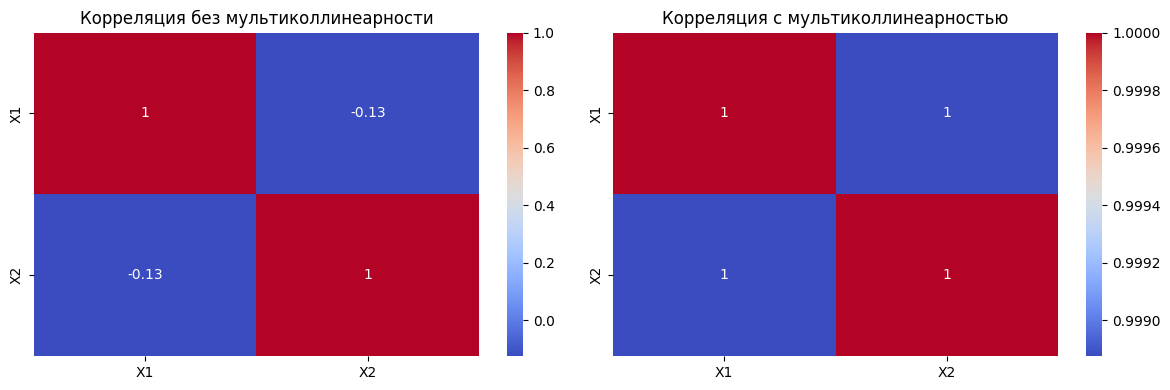

In [ ]:
# Признаки без мультиколлинеарности
X1 = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)
y_no_mc = 3 * X1 + 2 * X2 + np.random.normal(0, 1, 100)

# Признаки с мультиколлинеарностью: X2 ≈ X1
X1_mc = np.random.normal(0, 1, 100)
X2_mc = X1_mc + np.random.normal(0, 0.05, 100)  # почти то же самое
y_mc = 3 * X1_mc + 2 * X2_mc + np.random.normal(0, 1, 100)

# Без мультиколлинеарности
X_no_mc = pd.DataFrame({'X1': X1, 'X2': X2})
model_no_mc = LinearRegression()
model_no_mc.fit(X_no_mc, y_no_mc)

# С мультиколлинеарностью
X_mc = pd.DataFrame({'X1': X1_mc, 'X2': X2_mc})
model_mc = LinearRegression()
model_mc.fit(X_mc, y_mc)

# Корреляция признаков
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(X_no_mc.corr(), annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title("Корреляция без мультиколлинеарности")

sns.heatmap(X_mc.corr(), annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title("Корреляция с мультиколлинеарностью")

plt.tight_layout()
plt.show()

Давайте посмотрим на веса (коэффициенты) фичей (признаков), предсказанные обеими моделями. Реальные веса у нас были **3** и **2**.

In [ ]:
print(f"Коэффициенты признаков с мультиколлинеарностью: {model_mc.coef_[0]:.4f} и {model_mc.coef_[1]:.4f}")


Коэффициенты признаков с мультиколлинеарностью: -1.0599 и 6.1044


In [ ]:
print(f"Коэффициенты признаков без мультиколлинеарности: {model_no_mc.coef_[0]:.4f} и {model_no_mc.coef_[1]:.4f}")


Коэффициенты признаков без мультиколлинеарности: 3.0081 и 1.9323


Мы видим, что при наличии мультиколлинеарности модель не смогла правильно предсказать веса каждого из признаков из-за наличия связи между ними.

## 6. Выбросы

**Нарушение:** Искажают направление линии регрессии.

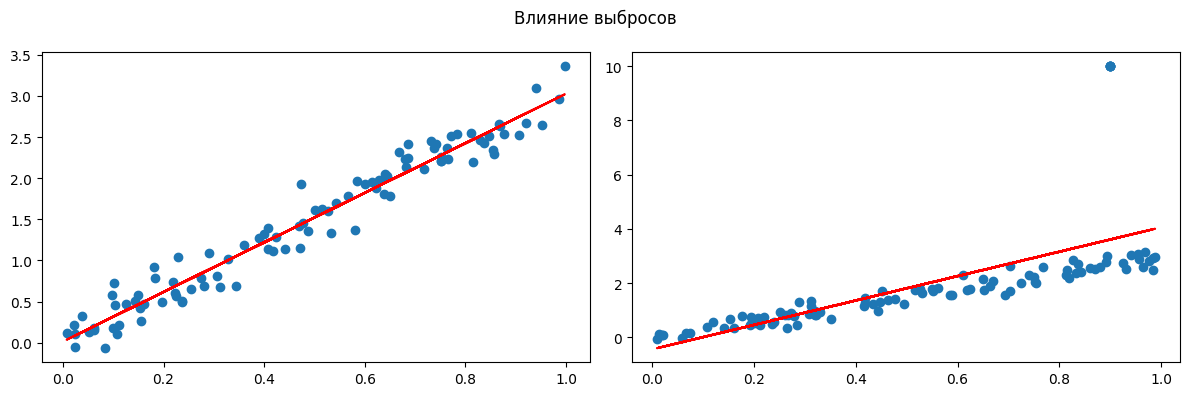

In [ ]:
# --------- Данные без выбросов

X = np.random.rand(100, 1)
err = np.random.normal(0, 0.2, 100)
y = 3 * X.squeeze() + err

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Создадим фигуру для будущих графиков
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=False, figsize=(12, 4))

# Нарисуем График регрессии
axes[0].scatter(X, y, label='Данные без выбросов')
axes[0].plot(X, y_pred, color='red', label='Линейная модель')

# --------- Данные без выбросов

X_out = np.random.rand(100, 1)
err = np.random.normal(0, 0.2, 100)
y_out = 3 * X_out.squeeze() + err
X_out[95:] = 0.9
y_out[95:] = 10

model = LinearRegression()
model.fit(X_out, y_out)
y_pred_out = model.predict(X_out)

# Нарисуем График регрессии
axes[1].scatter(X_out, y_out, label='Данные c выбросами')
axes[1].plot(X_out, y_pred_out, color='red', label='Линейная модель')

plt.suptitle("Влияние выбросов")
plt.tight_layout()
plt.show()

# 🔍 Практическая часть II: Предобработка данных

In [ ]:
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
CARS = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
CRIME = "https://github.com/evgpat/datasets/raw/refs/heads/main/crimedata.csv"

## Данные


Для демонстраций загрузим набор данных [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile). В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [ ]:
X_raw = pd.read_csv(
    CARS,
    header=None,
    na_values=["?"],
)

In [ ]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

## Предобработка данных

Предобработка данных важна при применении любых методов машинного обучения, а в особенности для линейных моделей. В sklearn предобработку удобно делать с помощью различных модулей [preprocessing](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) или методов библиотеки pandas.

### Обработка выбросов
В данной выборке мы не будем удалять выбросы, так как даннные собраны из разных стран, и разброс в значениях может быть обусловлен реальными факторами.
Приведем здесь основные примеры определения и удаления выбросов:
- Метод межквартильного размаха (interquartile range - IQR). Этот метод основан на вычислении межквартильного размаха данных, который определяет расстояние между 25-м и 75-м процентилями данных. Затем выбросы определяются как значения, находящиеся за пределами верхнего и нижнего порогов, определяемых как Q1 - 1.5 * IQR и Q3 + 1.5 * IQR соответственно.
```python
df = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5, 100],
    'col2': [10, 20, 30, 40, 50, 1000] # создаем DataFrame
})
Q1 = df['col1'].quantile(0.25) # определяем квартили для столбца 'col1'
Q3 = df['col1'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['col1'] >= Q1 - 1.5*IQR) & (df['col1'] <= Q3 + 1.5*IQR)] # удаляем выбросы в столбце 'col1'
```

- Удаление выбросов на основе статистических критериев. Этот метод использует статистические критерии, такие как Z-оценка или T-тест, для определения является ли значение выбросом. Если значение превышает определенный пороговый уровень, оно считается выбросом и удаляется.
```python
import scipy
df = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5, 100],
    'col2': [10, 20, 30, 40, 50, 1000] # создаем DataFrame
})
df = df[(np.abs(scipy.stats.zscore(df['col1'])) < 3)] # удаляем выбросы в столбце 'col1' на основе Z-оценки
```

### Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет ошибку при попытке передать такую матрицу в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. В ряде случаев пропуски лучше заполнить. Для этого существуют разные способы:
* заполнить средними (mean, median);
* заполнить уникальным значением (для деревьев и бустингов; не для линейных моделей);
* предсказывать пропущенные значения по непропущенным.

Часто используют первый вариант - он проще. Для заполнения константами можно использовать метод датафрейма `fillna`, для замены средними - класс `impute.SimpleImputer` (в более старых версиях `scikit-learn` - `preprocessing.Imputer`).

In [ ]:
X_raw.shape

(205, 25)

In [ ]:
X_raw.isnull().sum().sum()

np.int64(55)

In [ ]:
X_raw.isnull().sum()

,0
0,0
1,41
2,0
3,0
4,0
5,2
6,0
7,0
8,0
9,0


In [ ]:
# в датасете есть категориальные признаки, которые нужно было бы закодировать, но мы будем проходить эту тему далее в курсе и пока такие признаки удалим
# сначала сделаем маску
cat_features_mask = (
    X_raw.dtypes == "object"
).values  # категориальные признаки имеют тип "object"

In [ ]:
cat_features_mask

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False])

In [ ]:
# затем оставим только вещественнозначные признаки
X_real = X_raw[X_raw.columns[~cat_features_mask]]

In [ ]:
# для вещественнозначных признаков заполним пропуски средними
mis_replacer = SimpleImputer(strategy="mean") # median

X_no_mis= pd.DataFrame(
    data=mis_replacer.fit_transform(X_real), columns=X_real.columns
)

In [ ]:
X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0


In [ ]:
X_no_mis.isnull().any().any()

np.False_

In [ ]:
X_no_mis.shape

(205, 15)

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу.  Это важно по нескольким причинам:
* ускорение обучения модели;
* улучшение численной устойчивости при работе с матрицей объекты-признаки
* для линейных моделей: интерпретация весов при признаках как меры их значимости


В целом, если вы работаете с данными, которые содержат признаки с разными единицами измерения или используете алгоритмы, которые зависят от расстояний между объектами, то нормализация может быть полезной для улучшения производительности вашей модели.


Данные можно масштабировать по-разному:

- Стандартизация - вычитание среднего из каждого признака и деление на стандартное отклонение (`StandardScaler` в `sklearn`).

- Нормализация - вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (`MinMaxScaler` в `sklearn`).

Нормализация обычно используется, когда данные имеют распределение, которое сильно отклоняется от нормального распределения. Например, когда данные имеют сильные выбросы или содержат несколько групп, каждая из которых имеет свой диапазон значений. Нормализация помогает сжать диапазон значений признаков в заданный диапазон (например, [0,1]) и обеспечить более равномерное распределение значений.

Стандартизация обычно используется, когда данные имеют распределение, близкое к нормальному, и когда важно сохранить среднее значение и стандартное отклонение признаков. Стандартизация позволяет преобразовать данные таким образом, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это может быть полезно для алгоритмов, которые используют стандартные отклонения или коэффициенты корреляции признаков.

**Нормализация (MinMax нормализация):** Этот метод преобразует значения признаков в диапазон от 0 до 1 или от -1 до 1. Это можно сделать с помощью формулы:  
$$X_{norm} = \frac{(X - X_{min})}{(X_{max} - X_{min})}$$

где $X$ - значение признака, $X_{min}$ и $X_{max}$ - минимальное и максимальное значения признака соответственно. В библиотеке pandas для этого можно использовать класс MinMaxScaler из модуля sklearn.preprocessing.

In [ ]:
normalizer = MinMaxScaler()

X_real_norm_np = normalizer.fit_transform(X_no_mis)

X = pd.DataFrame(data=X_real_norm_np)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895


Для стандартизации данных в pandas можно использовать метод scikit-learn StandardScaler. Для этого нужно импортировать класс StandardScaler из модуля sklearn.preprocessing и создать экземпляр этого класса. Затем можно использовать метод fit_transform для обработки данных.

### Добавление признаков
Особенно важным моментом для линейной регрессии является нелинейное преобразование признаков. Это позволяет использовать линейную регрессию для моделирования нелинейных зависимостей.

Наиболее популярны следующие преобразования:
- полиномиальные признаки (PolynomialFeatures в sklearn)
- взятие логарифма
- квадратного корня
- применение тригонометрических функий

Например, посмотрев на данные, мы можем заметить, что зависимость целевой переменной от шестого признака скорее квадратичная, чем линейная:

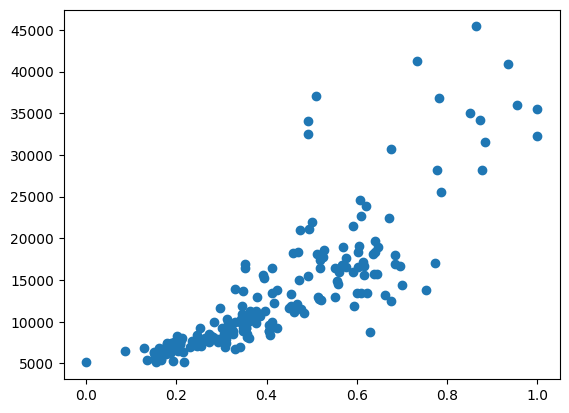

In [ ]:
plt.scatter(X[6], y)
plt.show()

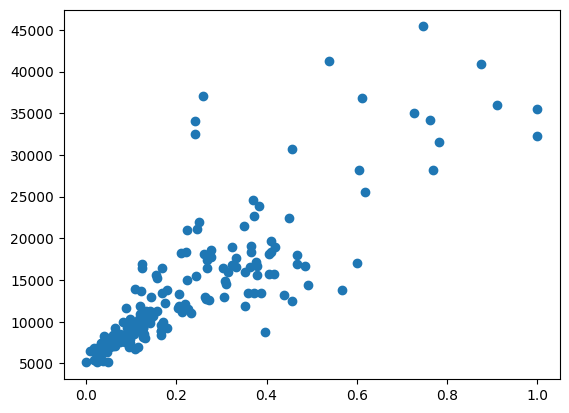

In [ ]:
plt.scatter(X[6] ** 2, y)
plt.show()

> А для признака номер 13 линеаризовать зависимость получается с помощью функции $\frac 1 {\sqrt{x}}$

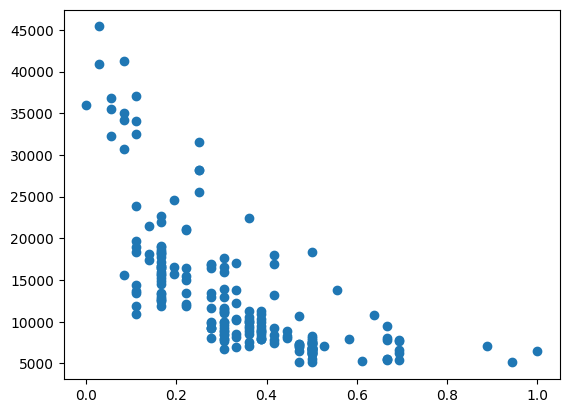

In [ ]:
plt.scatter(X[13], y)
plt.show()

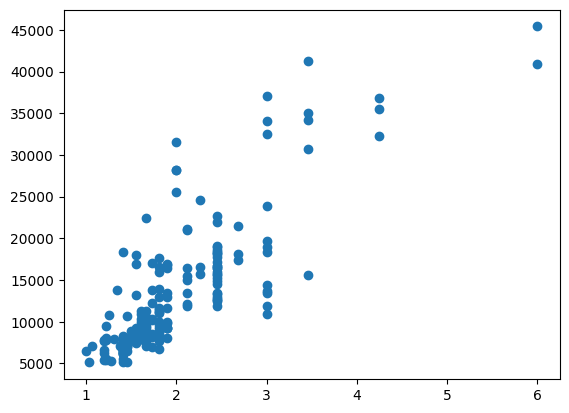

In [ ]:
plt.scatter(1 / np.sqrt(X[13]), y)
plt.show()

__Обратите внимание__: при генерации полиномиальных признаков матрица объекты-признаки может занимать много памяти.

$1, x_1, x_2, x_3 -> 1, ..., x_3, x_1^2, ..., x_3^2, x_1x_2, ...$



Данные -> Обогащение (добавление полиномиальных признаков) -> Отбор признаков (или снижение размерности) -> Обучение модели

# 🔍 Практическая часть III: Функции потерь в регрессии

Функционал качества в задачах обучения с учителем обычно задается в виде суммы по объектам выборки:
$$Q(a) = \frac 1 \ell \sum_{i=1}^\ell L(y_i, a(x_i)),$$
где $L(\cdot, \cdot)$ - функция потерь, задающая штраф за разницу между предсказанием и истинным значением целевого признака. Свойства функции потерь:
* $L(y_i, a(x_i)) \geqslant 0$;
* $L(y_i, y_i) = 0$.

Функционал качества должен в первую очередь отвечать требованиям заказчика, при этом математические свойства функции потерь могут быть неудобны для оптимизации.

__Пример:__ если мы не различаем маленькие ошибки (между 0.01 и 0.1 нет особой разницы), но зато не хотим получать большие ошибки, можно использовать следующую функцию потерь:

$$L(y_i, a(x_i)) = [| y_i - a(x_i) | < \varepsilon],$$ $\varepsilon$ - допустимая разница между предсказанием и фактом.


### Среднеквадратичная и средняя абсолютная ошибка


Кроме требований заказчика, функционал качества должен учитывать математические особенности модели - например, устойчивость к шумовым объектам.

В линейной регрессии Mean Squared Error: $L(y_i, a(x_i)) = (a(x_i) - y_i)^2$ не обладает этим свойством, потому что задает очень большие штрафы за большие отклонения от фактического значения.

$$MSE (a, X, Y) = \frac1L\sum^L_{i=1}(a(x_i) - y_i)^2$$

Рассмотрим это явление на примере. Выберем один признак, от которого целевой признак (имеющий индекс 15 в матрице X) зависит практически линейно. Добавим к выборке два объекта-выброса и посмотрим, как изменится оптимизированная на MSE прямая.

In [ ]:
X_subset = X[[7, 14]].values

X_subset_modified = np.vstack(
    (X_subset, [[1, 90], [2, 50]])
)  # добавление двух шумовых точек

In [ ]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])  # визуализируем точки
    lr = LinearRegression()
    lr.fit(
        X_subset[:, 0][:, np.newaxis], X_subset[:, 1]
    )  # вычислим веса линейной модели
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)  # визуализируем прямую

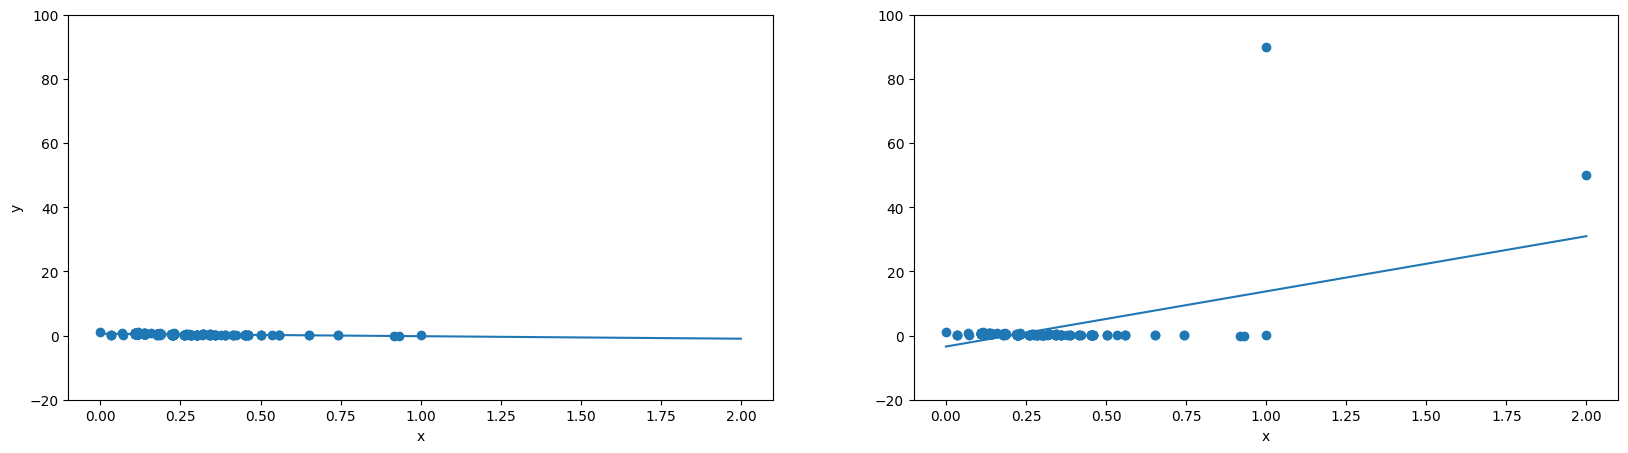

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.show()

Реализуем функцию для подсчета MSE с использованием numpy

In [ ]:
def MSE(y: np.array, y_pred: np.array) -> np.float64:
    return ((y-y_pred)**2).mean()

In [ ]:
a = np.array([11, 20, 19, 17, 10])
pred = np.array([12, 18, 19.5, 18, 9])
mse = MSE(y=a, y_pred=pred)
print("The Mean Square Error is: ", mse)
assert mse == 1.45

The Mean Square Error is:  1.45


Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения. Из-за того, разница возводится в квадрат - сложно дать этому числу интерпретацию. Для лучшей интерпретации используется Root Mean Square Error (RMSE). Таким образом, если MSE показывает разницу в квадратных единицах, значение RMSE сохранится в исходных.

$$RMSE (a, X, Y) = \sqrt{MSE (a, X)} = \sqrt{\frac 1L\sum^L_{i=1}(a(x_i) - y_i)^2}$$

In [ ]:
def RMSE(y: np.array, y_pred: np.array) -> np.float64:
    return np.sqrt(MSE(y,y_pred))


rmse = RMSE(y=a, y_pred=pred)
print("The Root Mean Square Error is: ", rmse)
assert rmse == 1.2041594578792296

The Root Mean Square Error is:  1.2041594578792296


Коэффициент детерминации $R^2$ показывает долю дисперсии в целевой переменной, которая обьяснена зависимыми переменными. $R^2$ можно интерпретировать как некоторого рода нормированное MSE.

$$R^2(a, X, Y) = 1 - \frac {\sum^L_{i=1}(a(x_i) - y_i)^2}{\sum^L_{i=1}(y_i - \bar{y})^2}$$

Реализуем функцию для вычисления $R^2$

In [ ]:
def R_squared(y: np.array, y_pred: np.array) -> np.float64:
    std = ((y-np.mean(y))**2).mean()

    return  1 - MSE(y,y_pred)/std


r_squared = R_squared(y=a, y_pred=pred)
print("The R2 is:", r_squared)

r2_score(a, pred)

The R2 is: 0.914906103286385


0.914906103286385

Из-за того, что мы учитываем квадрат отклонения - шумовые объекты могут сильно изменить наклон прямой. Поэтому в качестве альтернативы MSE можно использовать Mean Absolute Error: $L(y_i, a(x_i)) = |a(x_i) - y_i|$.

$$MAE(a, X, Y) = \frac {1}{L} \sum^L_{i=1}|a(x_i) - y_i|$$

Теперь обучим регрессию, оптимизируя MAE. В `sklearn` такая регрессия не реализована, но можно использовать модуль `statsmodels` - более формально, необходимая модель может быть получена с помощью обучения квантильной регрессии с параметром `q=0.5`.

Реализуем функцию для подсчета MAE с использованием numpy

In [ ]:
def MAE(y: np.array, y_pred: np.array) -> np.float64:
    return  np.abs(y-y_pred).mean()


mae = MAE(y=a, y_pred=pred)
print("The Mean Absolute Error is: ", mae)
assert mae == 1.1

The Mean Absolute Error is:  1.1


!pip install --user git+https://github.com/statsmodels/statsmodels # (если не работает импортирование библиотек ниже)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
def scatter_points_and_plot_line_MAE(X_subset):
    # задаем зависимость переменной f15 от переменной f7 и передаем данные
    mod = smf.quantreg("f15 ~ f7", pd.DataFrame(data=X_subset, columns=["f7", "f15"]))
    res = mod.fit(q=0.5) # минимизируем MAE

    # визуализируем точки
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)

    # визуализируем прямую
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])
    return mod, res

Text(0.5, 0, 'x')

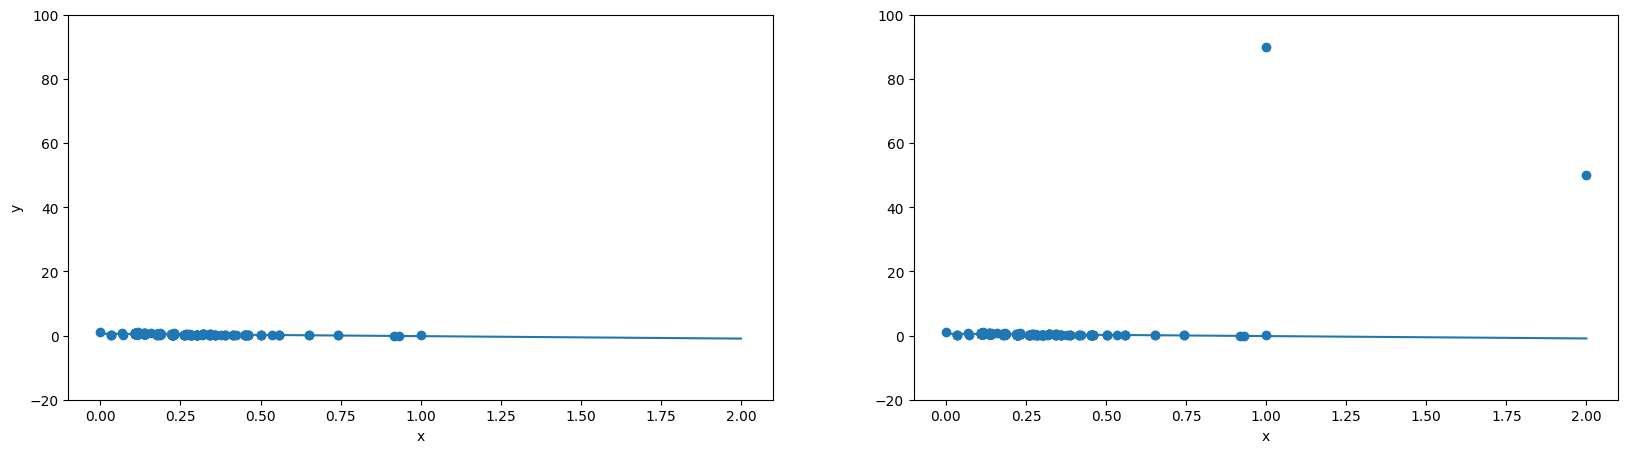

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая практически не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [ ]:
np.random.seed(13)
X_subset_modified_twice = np.vstack(
    (X_subset_modified, np.random.randint(5, size=60).reshape(-1, 2) * [1, 30])
)  # добавление 30 шумовых точек

Text(0.5, 0, 'x')

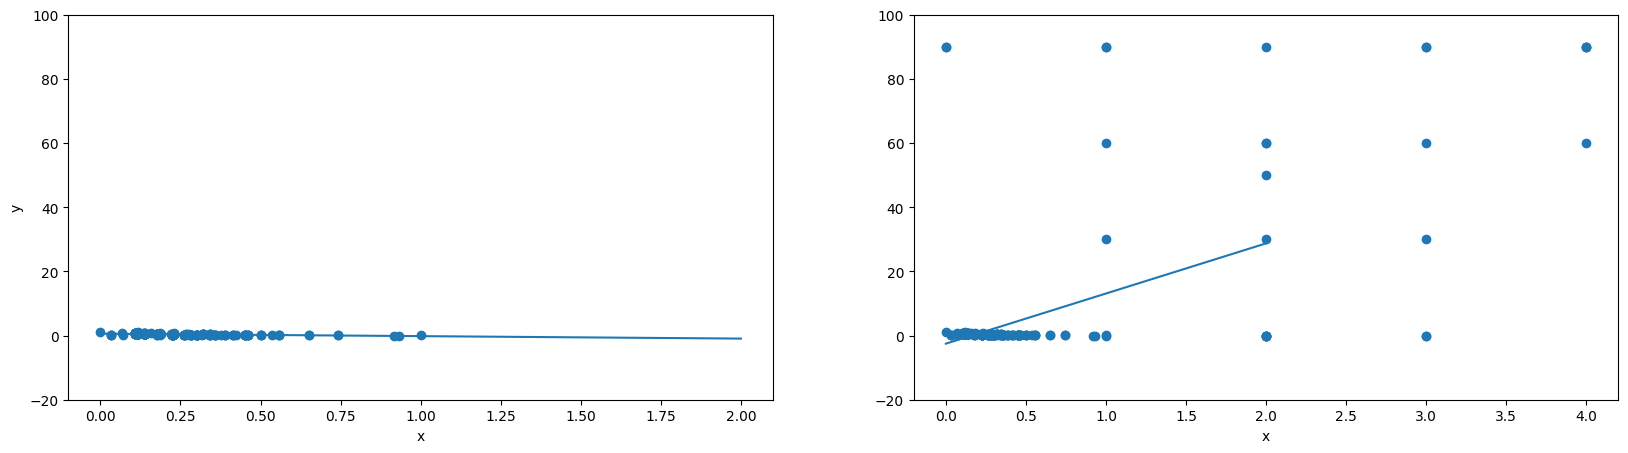

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified_twice)
plt.ylim(-20, 100)
plt.xlabel("x")

Под таким количеством выбросов, изменилась даже регрессия над MAE

### Huber Loss
Иногда используют "гибрид" MAE и MSE, который, как и MAE, устойчив к шумовым объектам, и как и MSE, мало штрафует малые отклонения от фактического значения целевого признака - Huber Loss:
$$L_i(y_i, a(x_i)) = \phi_\varepsilon(a(x_i) - y_i)$$
$$\phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}$$

Можно проверить, что у этой функции существует непрерывная первая проиводная во всех точках.

Оптимизация Huber Loss реализована в sklearn.

Реализуем функцию потерь Хьюбера

In [ ]:
def Huber(y: np.array, y_pred: np.array, eps: float = 1) -> np.float64:
    # <YOUR CODE HERE>
    diff = y - y_pred
    result = np.zeros_like(y)
    mask = (diff < eps) & (diff > -eps)
    result[mask] = diff[mask] ** 2 / 2
    result[~mask] = eps * (np.abs(diff[~mask]) - 1 / 2 * eps)
    return result.mean()


huber = Huber(y=a, y_pred=pred)
print("The Huber Loss is:", huber)

The Huber Loss is: 0.2


### Mean Squared Logarifmic Erorr (MSLE)

Данная функция потерь применяется в случаях, когда лучше получать заниженные прогнозы, нежели завышенные.

Важное примечание: из-за присутствия логарифма в формуле **целевая переменная должна быть неотрицательной!**. Единицу добавляем, чтобы случайно не получить логарифм нуля.

$$L_i(a, X_i, Y_i) = (\log(a(x_i)+1) - \log(y_i+1))^2$$

Реализуем MSLE

In [ ]:
def MSLE(y: np.array, y_pred: np.array) -> np.float64:
    # <YOUR CODE HERE>
    return ((np.log(y + 1) - np.log(y_pred + 1)) ** 2).mean()


msle = MSLE(y=a, y_pred=pred)
print("The Mean Squared Logarifmic Error is:", msle)

The Mean Squared Logarifmic Error is: 0.005808110727039668


### Quantile Loss

В некоторых задачах штраф за ошибку зависит не только от величины абсолютного отклонения от фактического значения, но и от знака этого отклонения. Например, лучше предсказать спрос больше, чем будет по факту, чем меньше, потому что во втором случае будет потеряна прибыль. В этом случае используется квантильная регрессия со следующей функцией потерь:
$$L_i(y_i, a(x_i)) = \rho_\tau(y_i - x_i^T w),$$
$$\rho_\tau(z) = \begin{cases} \tau z, \quad z > 0, \\ (\tau - 1) z, \quad z \leqslant 0 \end{cases}$$
Параметр $\tau \in (0, 1)$ влияет на то, насколько различаются штрафы за положительную и отрицательную разницу.

Изобразим график квантильной функции потерь вместе с некоторыми другими рассмотренными:

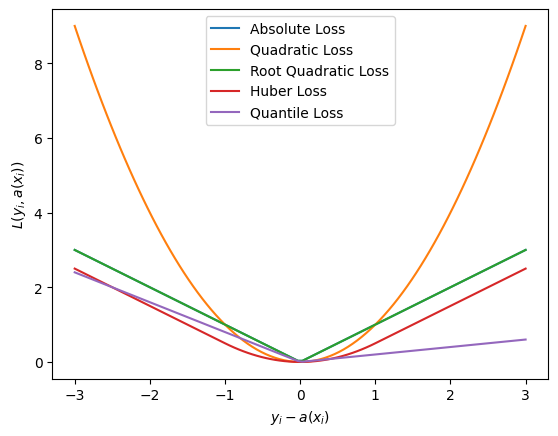

In [ ]:
grid = np.linspace(-3, 3, 100)
quantile_tau = 0.2
mse_loss = grid**2
rmse_loss = np.sqrt(mse_loss)
mae_loss = np.abs(grid)
huber_loss = (
    0.5 * mse_loss * (grid >= -1) * (grid <= 1)
    + (mae_loss - 0.5) * (grid < -1)
    + (mae_loss - 0.5) * (grid > 1)
)
quantile_loss = quantile_tau * grid * (grid > 0) + (quantile_tau - 1) * grid * (
    grid <= 0
)
plt.plot(grid, mae_loss, label="Absolute Loss")
plt.plot(grid, mse_loss, label="Quadratic Loss")
plt.plot(grid, rmse_loss, label="Root Quadratic Loss")
plt.plot(grid, huber_loss, label="Huber Loss")
plt.plot(grid, quantile_loss, label="Quantile Loss")
plt.xlabel("$y_i - a(x_i)$")
plt.ylabel("$L(y_i, a(x_i))$")
plt.legend()
plt.show()

Проследим наклон прямой в нашей одномерной задаче регрессии при изменении $\tau$:

Text(0, 0.5, 'y')

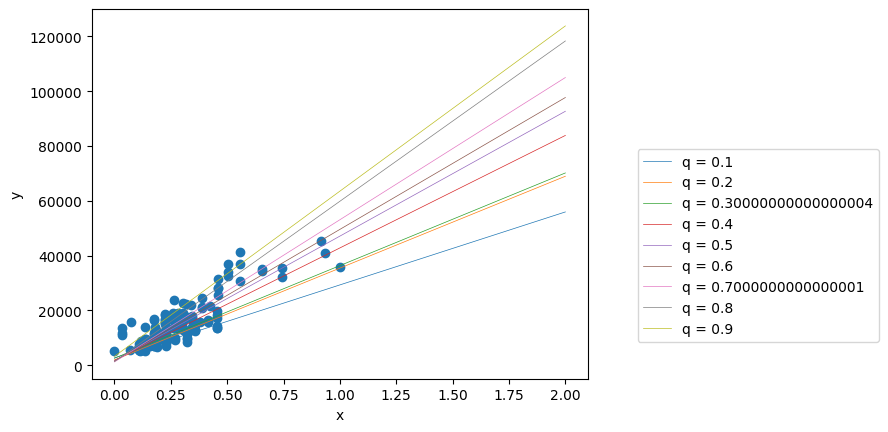

In [ ]:
plt.scatter(X[7], y)

grid = np.linspace(0, 2, 100)
dat = pd.DataFrame({"x": X[7], "y": y})
mod = smf.quantreg("y ~ x", dat)

for q in np.arange(0.1, 1, 0.1):
    res = mod.fit(q=q)
    plt.plot(
        grid,
        grid * res.params["x"] + res.params["Intercept"],
        linewidth=0.5,
        label="q = " + str(q),
    )

plt.legend(loc=(1.1, 0.1))
plt.xlabel("x")
plt.ylabel("y")

## Метрики: MAPE, sMAPE, WAPE

### Mape (Mean Absolute Percentage Error)

MAPE выражает среднее абсолютное отклонение прогнозируемых значений от фактических значений в процентах, что делает эту метрику очень наглядной для интерпретации результатов.

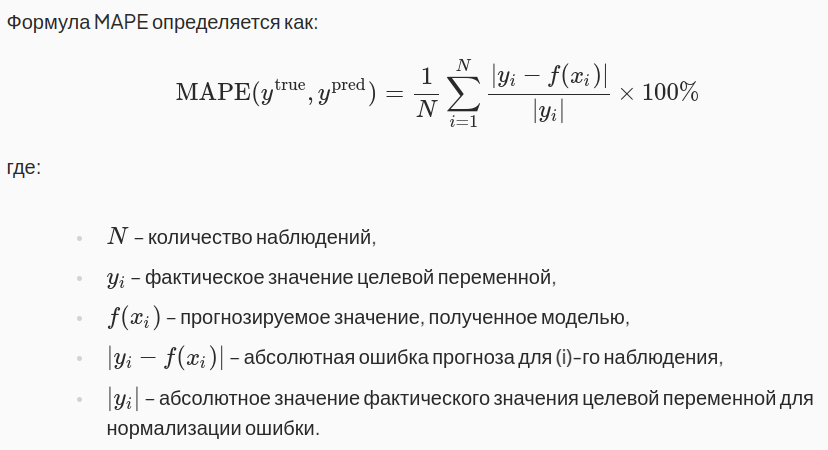

**Пример расчета MAPE**

Допустим, у нас есть данные о реальных и прогнозируемых продажах товара за 5 дней.

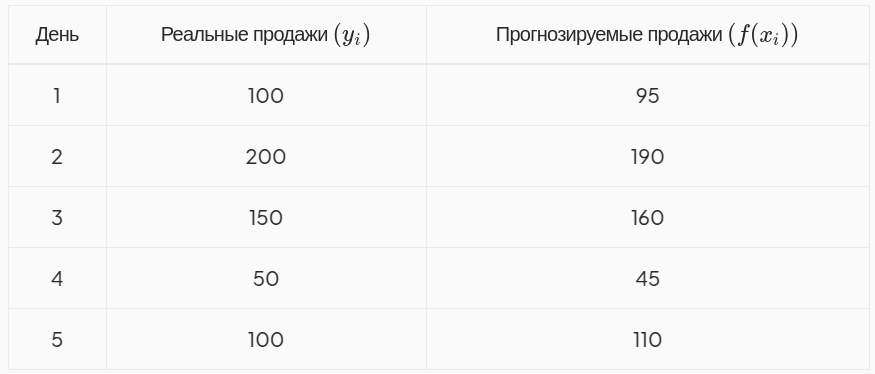

Реализуем метрику MAPE

In [ ]:
def mape(y_true, y_pred):
    """
    Вычисляет среднюю абсолютную процентную ошибку между фактическими и прогнозируемыми значениями.

    :param y_true: список фактических значений
    :param y_pred: список прогнозируемых значений
    """
    # Проверка, что списки имеют одинаковую длину
    assert len(y_true) == len(y_pred), "Списки должны быть одинаковой длины"

    # Расчет абсолютных процентных ошибок
    errors = [abs((true - pred) / true) for true, pred in zip(y_true, y_pred) if true != 0]

    # Исключение случаев, когда реальное значение равно 0, для предотвращения деления на 0
    # Расчет среднего значения (MAPE)
    mape_value = sum(errors) / len(errors) * 100
    return mape_value

# Пример использования
y_true = [100, 200, 150, 50, 100]
y_pred = [95, 190, 160, 45, 110]

print(f"MAPE: {mape(y_true, y_pred):.2f} %")

MAPE: 7.33 %


### sMAPE (Symmetric Mean Absolute Percentage Error)

 SMAPE является метрикой оценки точности прогнозов, которая широко используется для измерения степени точности прогнозов в задачах регрессии. Она представляет собой улучшенную версию MAPE (среднего абсолютного процентного отклонения), поскольку более симметрично учитывает разницу между фактическими и прогнозируемыми значениями, минимизируя влияние экстремальных значений.

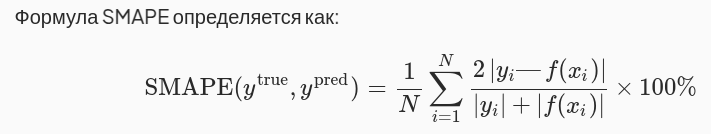

**Пример расчета sMAPE**

Допустим, у нас есть данные о реальных и прогнозируемых продажах товара за 5 дней.

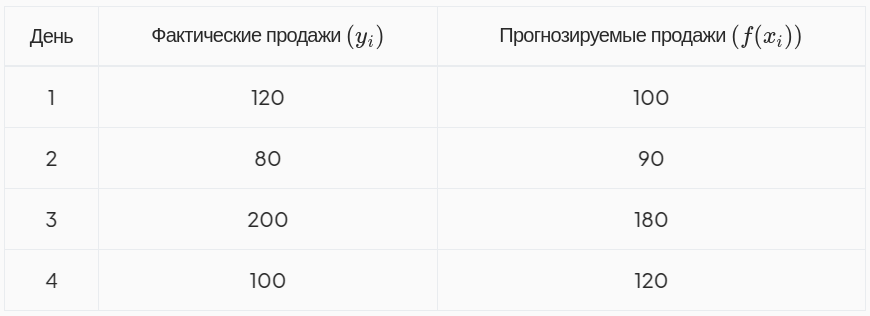

Реализуем метрику sMAPE

In [ ]:
def smape(y_true, y_pred):
    """
    Вычисляет симметричную среднюю абсолютную процентную ошибку между фактическими и прогнозируемыми значениями.

    :param y_true: список фактических значений
    :param y_pred: список прогнозируемых значений
    """
    # Проверка, что списки имеют одинаковую длину
    assert len(y_true) == len(y_pred), "Списки должны быть одинаковой длины"

    # Расчет абсолютных процентных ошибок
    errors = [2 * abs(true - pred) / (abs(true) + abs(pred)) for true, pred in zip(y_true, y_pred) if (true + pred) != 0]

    # Исключение случаев, когда сумма фактического и прогнозируемого значения равна 0, для предотвращения деления на 0
    # Расчет среднего значения (SMAPE)
    smape_value = sum(errors) / len(errors) * 100
    return smape_value

# Пример использования
y_true = [120, 80, 200, 100]
y_pred = [100, 90, 180, 120]

print(f"SMAPE: {smape(y_true, y_pred):.2f}%")

SMAPE: 14.66%


### WAPE (Weighted Average Percentage Error)

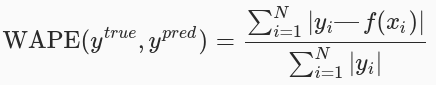

**Пример расчета WAPE**

Представим, что у нас есть данные за определенный период с сильными колебаниями в объемах продаж из-за сезонности, акций, или других факторов.

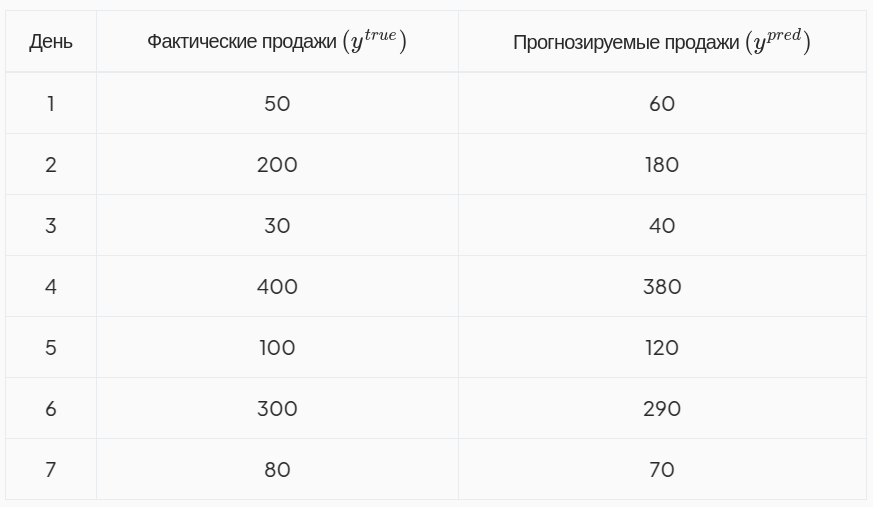

Метрику WAPE тоже реализуем в коде:)

In [ ]:
def wape(y_true, y_pred):
    """
    Вычисляет взвешенную абсолютную процентную ошибку между фактическими и прогнозируемыми значениями.

    :param y_true: список фактических значений
    :param y_pred: список прогнозируемых значений
    """
    # Проверка, что списки имеют одинаковую длину
    assert len(y_true) == len(y_pred), "Списки должны быть одинаковой длины"

    # Расчет абсолютной ошибки и суммы фактических продаж
    total_error = sum(abs(true - pred) for true, pred in zip(y_true, y_pred))
    total_sales = sum(y_true)

    # Расчет взвешенной абсолютной процентной ошибки (WAPE)
    wape_value = total_error / total_sales * 100
    return wape_value

# Пример использования
y_true = [50, 200, 30, 400, 100, 300, 80]
y_pred = [60, 180, 40, 380, 120, 290, 70]

print(f"WAPE: {wape(y_true, y_pred):.2f}%")

WAPE: 8.62%


## Связь метрик с бизнесом

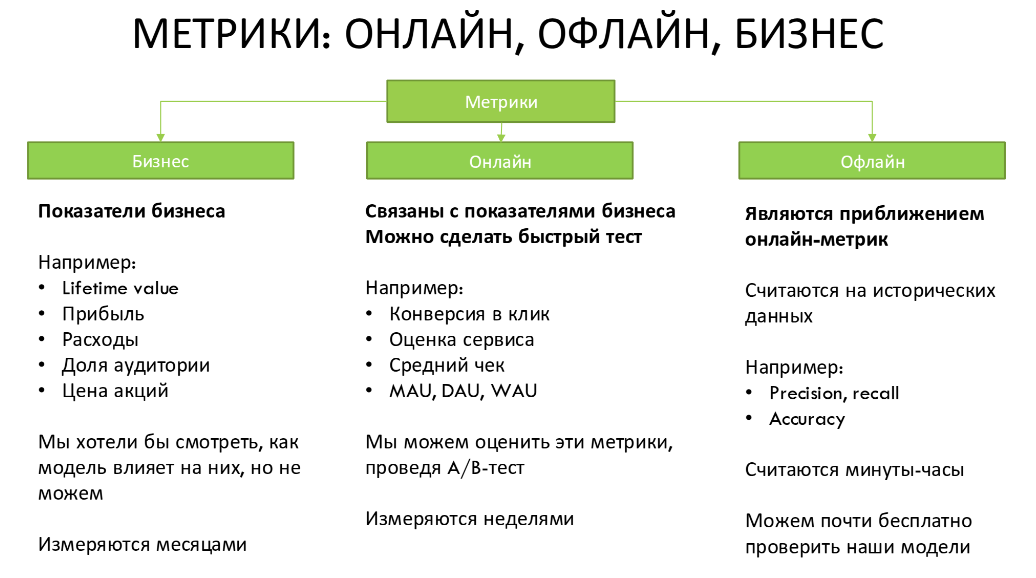

## Применимость

Линейная регрессия хорошо работает, когда:
- Связь между переменными действительно линейная
- Данные чистые, без выбросов
- Все предпосылки выполнены

Если предпосылки нарушаются — модель может быть некорректной или давать плохие прогнозы. В таких случаях лучше использовать:
- Полиномиальную регрессию
- Регуляризацию (Ridge/Lasso)
- Деревья решений и ансамбли

Эти модели мы будем проходить на последующих занятиях

---

## Преимущества линейной регрессии

- Простота реализации
- Быстрое обучение
- Интерпретируемость (понятные коэффициенты)

## Недостатки

- Чувствительность к выбросам
- Плохо работает с нелинейными зависимостями
- Требует выполнения предпосылок

# Бонус. Линейная регрессия из библиотеки `statsmodels`

Напоследок обратимся к еще одной реализации модели линейной регрессии с помощью библиотеки `statsmodels`. В нее уже включены различные статистические тесты, которые мы рассмотрели ранее в ноутбуке. Рассмотрим примеры из раздела с мульиколлинеарностью и ее отсутсвием.

In [ ]:
import statsmodels.api as sm

In [ ]:
# Без мультиколлинеарности
X_no_mc = pd.DataFrame({'X1': X1, 'X2': X2})
X_no_mc_const = sm.add_constant(X_no_mc)
model_no_mc = sm.OLS(y_no_mc, X_no_mc_const).fit()

# С мультиколлинеарностью
X_mc = pd.DataFrame({'X1': X1_mc, 'X2': X2_mc})
X_mc_const = sm.add_constant(X_mc)
model_mc = sm.OLS(y_mc, X_mc_const).fit()

# Вывод результатов
print("=== Без мультиколлинеарности ===")
print(model_no_mc.summary())

print("\n=== С мультиколлинеарностью ===")
print(model_mc.summary())

=== Без мультиколлинеарности ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     500.2
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           7.93e-52
Time:                        20:35:21   Log-Likelihood:                -137.54
No. Observations:                 100   AIC:                             281.1
Df Residuals:                      97   BIC:                             288.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.12

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("📊 VIF без мультиколлинеарности:")
print(compute_vif(X_no_mc))

print("\n📊 VIF с мультиколлинеарностью:")
print(compute_vif(X_mc))

📊 VIF без мультиколлинеарности:
  Feature       VIF
0      X1  1.015902
1      X2  1.015902

📊 VIF с мультиколлинеарностью:
  Feature         VIF
0      X1  468.268993
1      X2  468.268993


## Как читать OLS `.summary()`

### 1. Верхняя часть:
- `R-squared`, `Adj. R-squared`: качество модели
- `F-statistic` и `Prob (F-statistic)`: значимость модели
- `AIC`, `BIC`: сравнение моделей по информационным критериям
<br>! Можно видеть высокое R² (модель объясняет много дисперсии), но при этом p-value для отдельных переменных становится большим ( > 0.05). Это парадокс: модель вроде “работает”, но нельзя сказать, какие признаки значимы

### 2. Таблица коэффициентов:
- `coef`: оценка коэффициента
- `std err`: его стандартная ошибка
- `t`, `P>|t|`: статистическая значимость
- `[0.025 0.975]`: доверительный интервал
<br> ! В строках X1 и X2 стандартная ошибка при мультиколлинеарности  значительно выше, чем в случае без неё. Почему это важно?<br>
Если признаки сильно коррелированы, модель не может “уверенно” оценить вклад каждого из них → разброс (ошибка) оценки коэффициента возрастает.<br><br>

### 3. Оценка остатков:
- `Omnibus`, `Jarque-Bera`: нормальность остатков
- `Skew`, `Kurtosis`: форма распределения
- `Durbin-Watson`: автокорреляция (идеал ≈ 2)
- `Cond. No`: мультиколлинеарность (норма < 100)

---

##  Резюме: на что смотреть в OLS summary

| Компонент | Интерпретация |
|-----------|----------------|
| `R²`, `Adj. R²` | Чем ближе к 1 — тем лучше |
| $P>|t|$ | Малое → признак значим |
| `Durbin-Watson` | 1.5–2.5 — нормальная независимость ошибок |
| `Cond. No` | > 100 → возможна мультиколлинеарность |
| `VIF` | > 5–10 → тревожный сигнал |

---